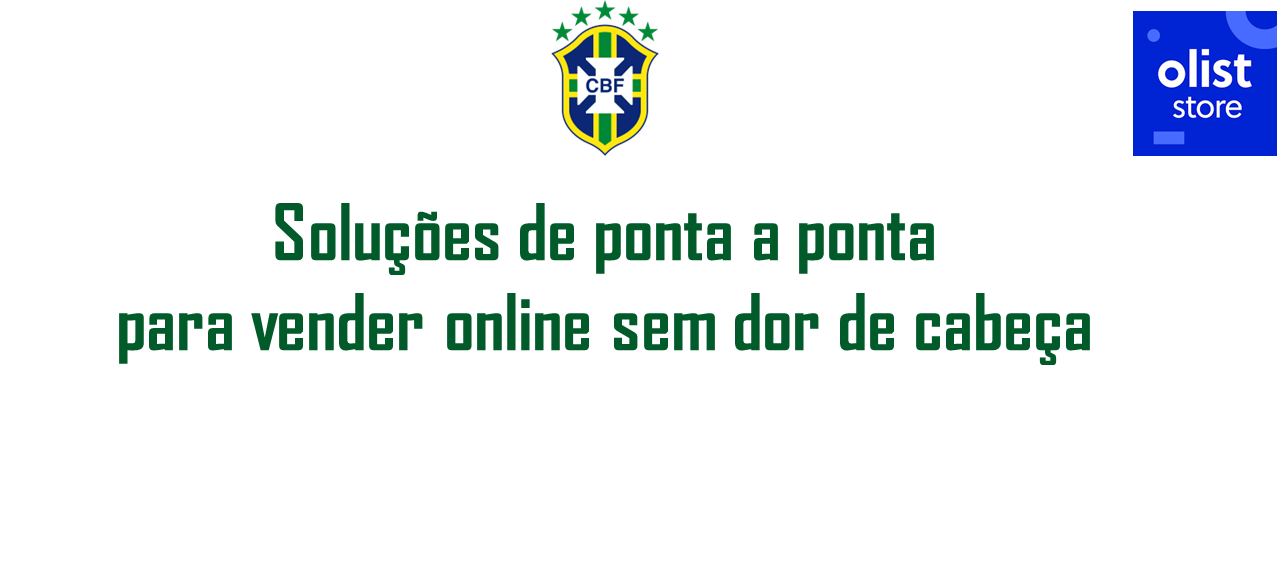

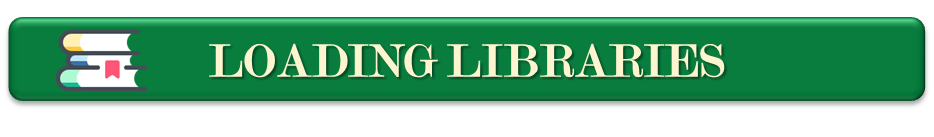

In [1]:
%load_ext pycodestyle_magic 
%pycodestyle_on 

In [2]:
import numpy as np
from numpy import percentile
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib as plt
import seaborn as sns

import missingno as msno

from datetime import datetime, timedelta

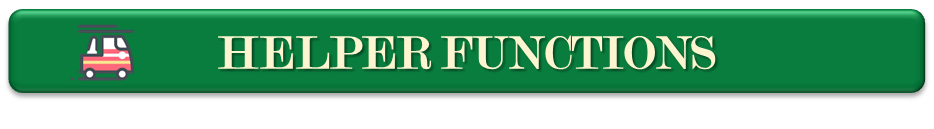

In [3]:
def single_value_search(df):
    list_column_single = []
    for col_ in df.columns:
        if len((np.unique(df[col_])).astype(str)) == 1:
            list_column_single.append(col_)
    if len(list_column_single) > 0:
        print('Columns contain a single value')
        print(list_column_single)
    else:
        print("None of the columns contains a single value.")

In [4]:
# Checking percentage of missing value

def percent_missing_value(df):
    feature_50 = []
    for i in df.columns:
        number = df[i].isna().sum()
        percentage = number/len(df)*100
        print(i, ' :', number, ' soit ', "%.2f" % percentage
              + '% de valeurs manquantes')
        if percentage > 50:
            feature_50.append(i)
    print('-'*40)
    print('List of variables with more than 50 missing values ', feature_50)
    print('-'*40)
    print('Number of missing values ', "{:,}".format(df.isna().sum().sum()),
          ' on ', "{:,}".format(df.shape[0]*df.shape[1]))
    print('-'*40)
    print('Percentage of missing values ',
          str("%.2f" % (df.isna().sum().sum() /
                        (df.shape[0] * df.shape[1])*100)), ' %')
    print('-'*40)
    print("Heatmap for viewing missing values", '\n',
          '** Number of rows : ', "{:,}".format(df.shape[0]), '\n',
          '** Number of columns : ',
          "{:,}".format(df.shape[1]))
    msno.matrix(df, filter='bottom', figsize=(25, 10),
                sparkline=False, label_rotation=90)

In [5]:
def uni_analyse_quant(df, row_number):
    data = df[df.columns[row_number]]
    fig = plt.figure(figsize=(15, 10))
    grid = plt.GridSpec(2, 2, wspace=1, hspace=0.3)
    plt.subplot(grid[0, 0])
    sns.histplot(data, kde=True)
    plt.title('Distribution of '+df.columns[row_number])
    plt.subplot(grid[0, 1])
    sns.boxplot(x=data)
    plt.title('Boxplot of '+df.columns[row_number])

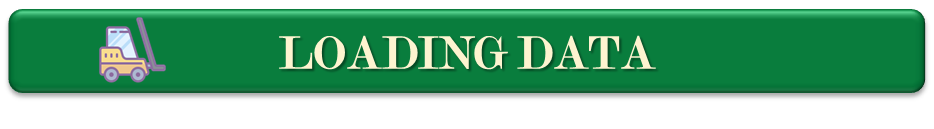

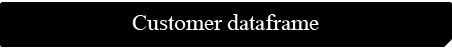

In [6]:
customers = pd.read_csv('C:/Users/td/Documents/3. FORMATIONS/\
2 - OPENCLASSROOMS/Data Science/5. Projet 5/\
0. Data/olist_customers_dataset.csv')

In [7]:
customers[customers['customer_unique_id']
          .duplicated(keep=False)]\
          .sort_values(['customer_unique_id'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
...,...,...,...,...,...
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,extrema,MG


🕵🏼‍♀️ The variable that <ins>uniquely identifies</ins> the customer is <b>'customer unique id'</B>

In [8]:
customers = customers[['customer_id', 'customer_unique_id']]

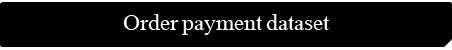

In [9]:
order_payment = pd.read_csv('C:/Users/td/Documents/3. FORMATIONS/\
2 - OPENCLASSROOMS/Data Science/5. Projet 5/\
0. Data/olist_order_payments_dataset.csv')

In [10]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


💰 <b>Payment sequential</b><br><br>
➙ One order could have several payments sequential.<br><br>
➙ In the analysis, it is unnecessary to have this segmentation.<br><br>
➙ I proceed to an aggregate in order to have one line per order

In [11]:
order_payment = (order_payment[['order_id', 'payment_value']]
                 .groupby(['order_id'])
                 .agg(func='sum')
                 .reset_index())

In [12]:
order_payment.shape

(99440, 2)

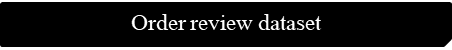

In [13]:
order_review = pd.read_csv('C:/Users/td/Documents/3. FORMATIONS/\
2 - OPENCLASSROOMS/Data Science/5. Projet 5/\
0. Data/olist_order_reviews_dataset.csv')

In [14]:
order_review[order_review['order_id']
             .duplicated(keep=False)].sort_values(['order_id'])

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
854,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:06
...,...,...,...,...,...,...,...
27465,5e78482ee783451be6026e5cf0c72de1,ff763b73e473d03c321bcd5a053316e8,3,NaN,Não sei que haverá acontecido os demais chegaram,2017-11-18 00:00:00,2017-11-18 09:02:48
41355,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55
18783,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anu...",2017-08-22 00:00:00,2017-08-25 11:40:22
92230,870d856a4873d3a67252b0c51d79b950,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-20 18:50:16


In [15]:
order_review = (order_review[['order_id', 'review_score']]
                .groupby(['order_id'])
                .agg(func='mean')
                .reset_index())

In [16]:
order_review.shape

(98673, 2)

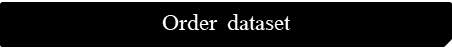

In [17]:
order_dataset = pd.read_csv('C:/Users/td/Documents/3. FORMATIONS/\
2 - OPENCLASSROOMS/Data Science/5. Projet 5/\
0. Data/olist_orders_dataset.csv')

In [18]:
order_dataset.shape

(99441, 8)

In [19]:
order_dataset[order_dataset['order_id']
              .duplicated(keep=False)].sort_values('order_id')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [20]:
order_dataset = order_dataset[['customer_id',
                               'order_id',
                               'order_purchase_timestamp']]

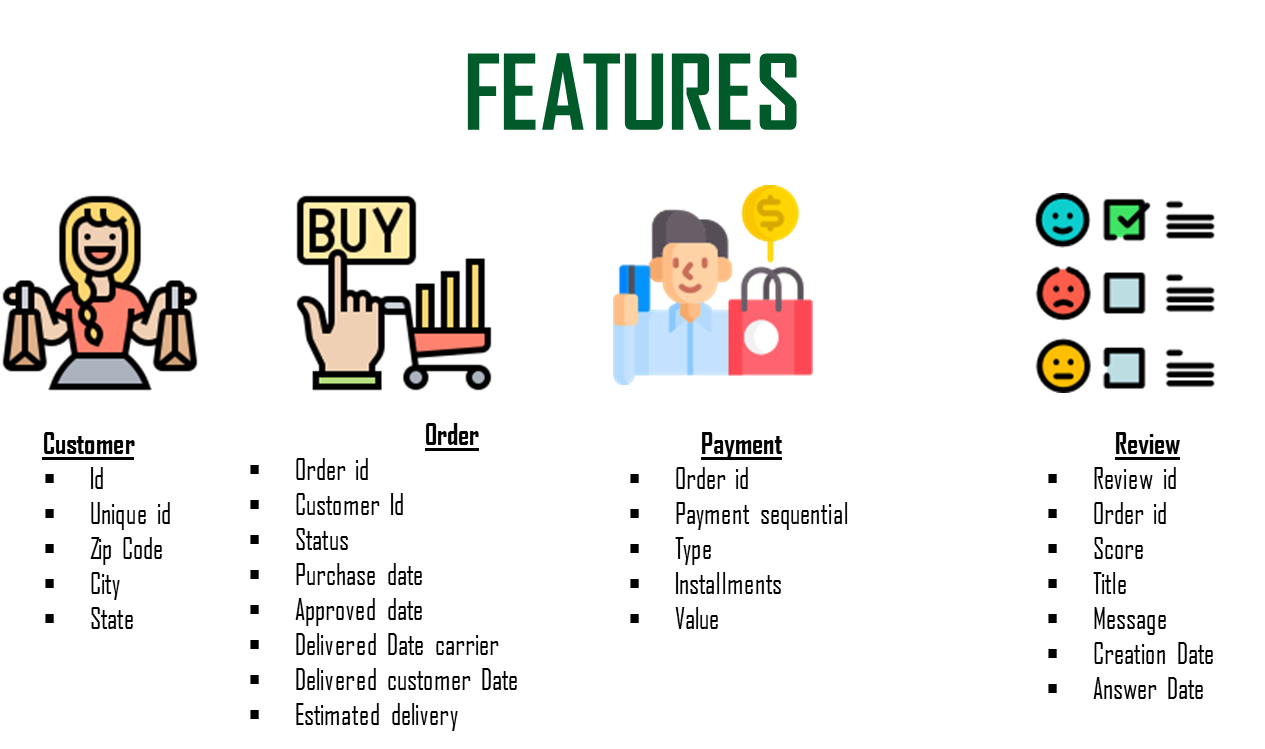

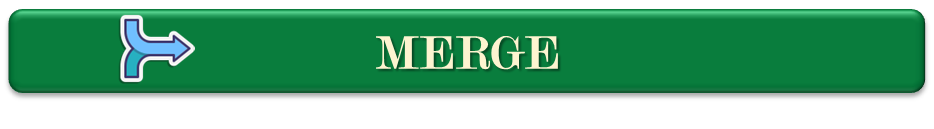

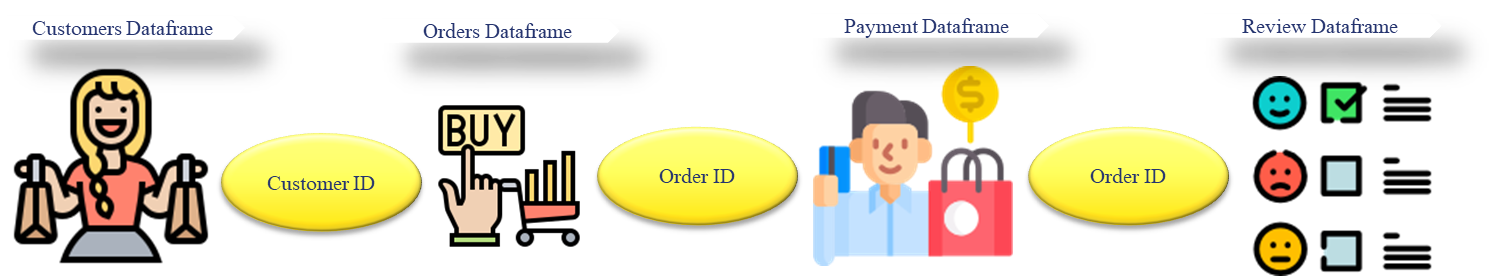

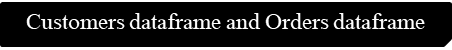

In [21]:
customers.shape, order_dataset.shape

((99441, 2), (99441, 3))

In [22]:
customers.columns, order_dataset.columns

(Index(['customer_id', 'customer_unique_id'], dtype='object'),
 Index(['customer_id', 'order_id', 'order_purchase_timestamp'], dtype='object'))

In [23]:
df = pd.merge(customers, order_dataset, how='outer', on='customer_id')
df.head(2)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24


In [24]:
df.shape

(99441, 4)

In [25]:
order_dataset[order_dataset['order_id'].duplicated()]

,customer_id,order_id,order_purchase_timestamp


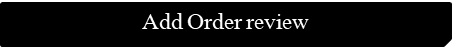

In [26]:
df.shape, order_review.shape

((99441, 4), (98673, 2))

In [27]:
df.columns, order_review.columns

(Index(['customer_id', 'customer_unique_id', 'order_id',
        'order_purchase_timestamp'],
       dtype='object'),
 Index(['order_id', 'review_score'], dtype='object'))

In [28]:
df = pd.merge(df, order_review, on='order_id', how='left')
df.shape

(99441, 5)

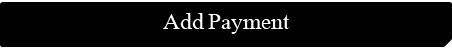

In [29]:
df.shape, order_payment.shape

((99441, 5), (99440, 2))

In [30]:
df.columns, order_payment.columns

(Index(['customer_id', 'customer_unique_id', 'order_id',
        'order_purchase_timestamp', 'review_score'],
       dtype='object'),
 Index(['order_id', 'payment_value'], dtype='object'))

In [31]:
df = pd.merge(df, order_payment, how='left', on='order_id')
df.shape

(99441, 6)

In [32]:
order_payment[order_payment['order_id']
              .duplicated(keep=False)].sort_values(['order_id'])

,order_id,payment_value


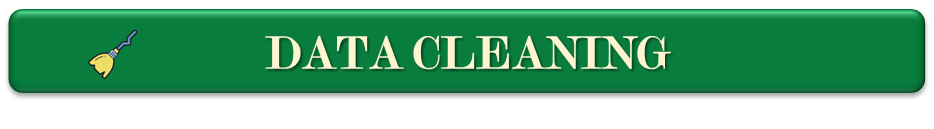

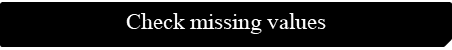

customer_id  : 0  soit  0.00% de valeurs manquantes
customer_unique_id  : 0  soit  0.00% de valeurs manquantes
order_id  : 0  soit  0.00% de valeurs manquantes
order_purchase_timestamp  : 0  soit  0.00% de valeurs manquantes
review_score  : 768  soit  0.77% de valeurs manquantes
payment_value  : 1  soit  0.00% de valeurs manquantes
----------------------------------------
List of variables with more than 50 missing values  []
----------------------------------------
Number of missing values  769  on  596,646
----------------------------------------
Percentage of missing values  0.13  %
----------------------------------------
Heatmap for viewing missing values 
 ** Number of rows :  99,441 
 ** Number of columns :  6


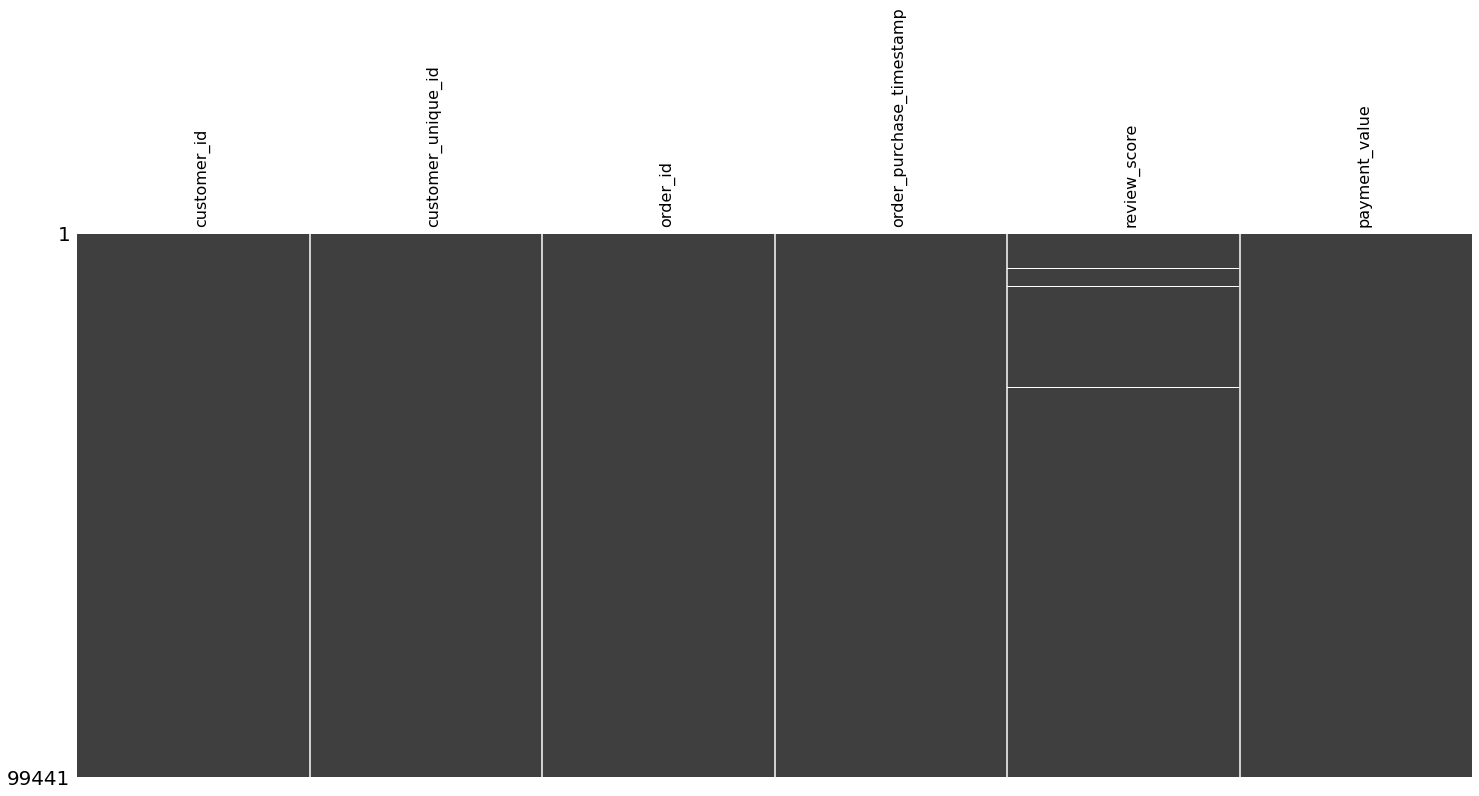

In [33]:
percent_missing_value(df)

Missing values represent only 0.13 per cent of the data.They are therefore deleted

In [34]:
df = df.dropna(subset=['review_score', 'payment_value'], axis=0)
df.shape[0]+769

99441

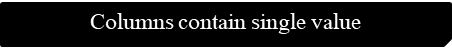

Columns that have a single observation or value are probably useless for modeling.<br>
Thesecolumns or predictors are referred to zero-variance predictors as if we measured the variance
(average value from the mean), it would be zero.

In [35]:
single_value_search(df)

None of the columns contains a single value.


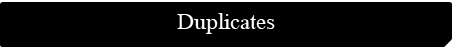

In [36]:
df[df.duplicated()]

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,review_score,payment_value


In [37]:
df[df['order_id'].duplicated()]

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,review_score,payment_value


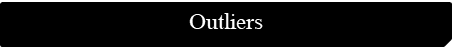

Interquartile Range Method -- not normal distribution

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

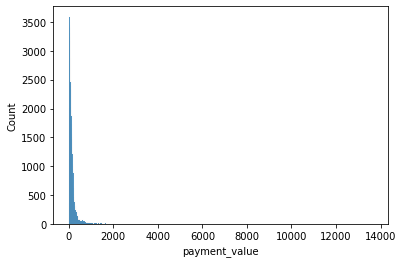

In [38]:
sns.histplot(df['payment_value'])

<AxesSubplot:xlabel='payment_value'>

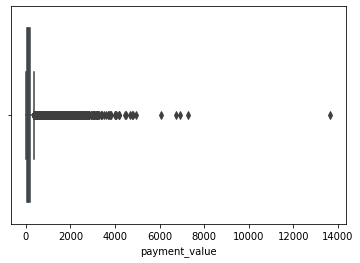

In [39]:
sns.boxplot(data=df, x='payment_value')

In [40]:
# calculate interquartile range
q25, q75 = (percentile(df['payment_value'],
                       25), percentile(df['payment_value'], 75))
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=61.980, 75th=176.810, IQR=114.830


In [41]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
lower, upper

(-110.26500000000001, 349.055)

In [42]:
# identify outliers
outliers = [x for x in df['payment_value'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
print((7803/df.shape[0])*100)

df.shape[0]-7803

Identified outliers: 7803
7.908018485487271


90869

In [43]:
# remove outliers
outliers_removed = [x for x in df['payment_value']
                    if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 90869


In [44]:
# Remove irrelevant variable

df = df.drop(['customer_id'], axis=1)

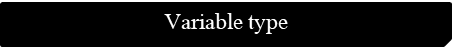

In [45]:
df.dtypes

customer_unique_id           object
order_id                     object
order_purchase_timestamp     object
review_score                float64
payment_value               float64
dtype: object

In [46]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [47]:
df.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
review_score                       float64
payment_value                      float64
dtype: object

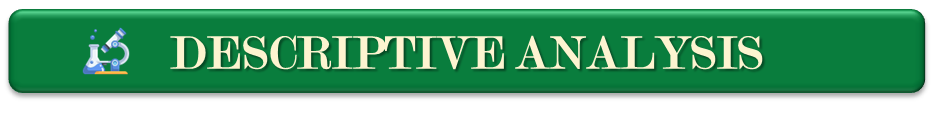

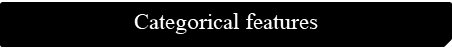

In [48]:
df.describe(include='O')

,customer_unique_id,order_id
count,98672,98672
unique,95379,98672
top,8d50f5eadf50201ccdcedfb9e2ac8455,a7ba0112ae1019055442b330ee484e67
freq,17,1


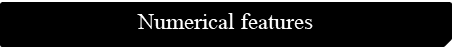

In [49]:
df.describe()

,review_score,payment_value
count,98672.000000,98672.000000
mean,4.086825,160.725492
std,1.346245,220.685360
min,1.000000,0.000000
25%,4.000000,61.980000
50%,5.000000,105.280000
75%,5.000000,176.810000
max,5.000000,13664.080000


<AxesSubplot:xlabel='review_score'>

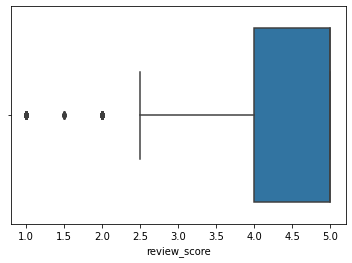

In [50]:
sns.boxplot(data=df, x='review_score')

Number of purchase per month
Percentage of payment by type of paiment
Delivery time
Somethin on map

<AxesSubplot:xlabel='payment_value'>

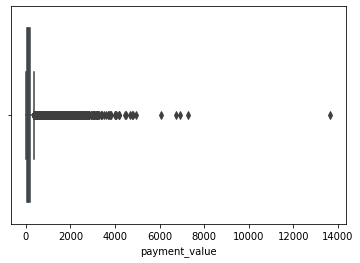

In [51]:
sns.boxplot(data=df, x='payment_value')

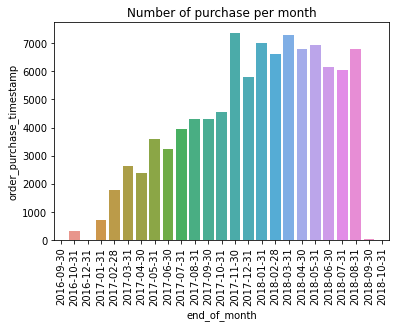

In [53]:
df['end_of_month'] = (df['order_purchase_timestamp']+MonthEnd()).dt.date

ax = sns.barplot(data=(df
                       .groupby(['end_of_month'])
                       .agg({'order_purchase_timestamp': 'count'}))
                 .reset_index(), x='end_of_month',
                 y='order_purchase_timestamp')
ax.set_title('Number of purchase per month')
ax.tick_params(axis='x', rotation=90)

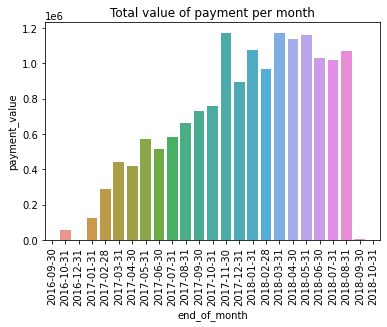

In [54]:
ax = sns.barplot(data=(df
                       .groupby(['end_of_month'])
                       .agg({'payment_value': sum}))
                 .reset_index(), x='end_of_month',
                 y='payment_value')
ax.set_title('Total value of payment per month')
ax.tick_params(axis='x', rotation=90)

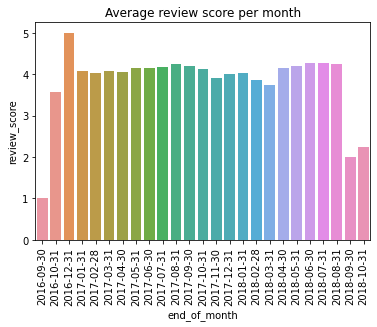

In [55]:
ax = sns.barplot(data=(df
                       .groupby(['end_of_month'])
                       .agg({'review_score': 'mean'}))
                 .reset_index(), x='end_of_month',
                 y='review_score')
ax.set_title('Average review score per month')
ax.tick_params(axis='x', rotation=90)

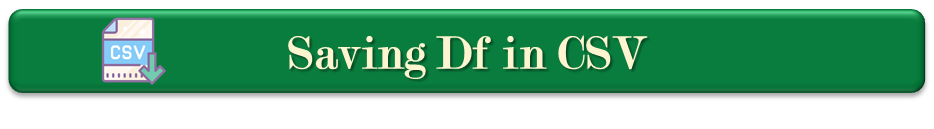

In [56]:
df = df.drop(['end_of_month'], axis=1)

In [57]:
# saving to csv

df.to_csv("customer_clusters.csv", index=False)

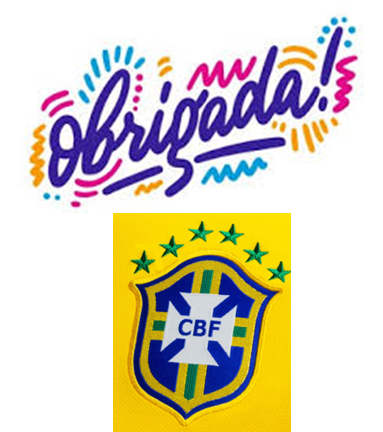